In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
data = pd.read_csv('C:/Users/KIRAN/OneDrive/Desktop/datasets/accepted_2007_to_2018Q4.csv')

In [47]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [49]:
missing = data.isna().sum().sort_values(ascending = False)

In [50]:
missing.head(10)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_last_payment_amount                  2249784
hardship_payoff_balance_amount                2249784
dtype: int64

In [51]:
null_greaterthan_70 = data.columns[((data.isna().sum()/len(data))*100)>70].tolist()
null_greaterthan_70

['member_id',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percenta

In [52]:
data = data.drop(columns = null_greaterthan_70)

In [53]:
num_col = [col for col in data.columns if data[col].dtype in ['int64','float64']]
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [54]:
for col in num_col:
    print(col,'\t',data[col].isna().sum())

loan_amnt 	 33
funded_amnt 	 33
funded_amnt_inv 	 33
int_rate 	 33
installment 	 33
annual_inc 	 37
dti 	 1744
delinq_2yrs 	 62
fico_range_low 	 33
fico_range_high 	 33
inq_last_6mths 	 63
mths_since_last_delinq 	 1158535
open_acc 	 62
pub_rec 	 62
revol_bal 	 33
revol_util 	 1835
total_acc 	 62
out_prncp 	 33
out_prncp_inv 	 33
total_pymnt 	 33
total_pymnt_inv 	 33
total_rec_prncp 	 33
total_rec_int 	 33
total_rec_late_fee 	 33
recoveries 	 33
collection_recovery_fee 	 33
last_pymnt_amnt 	 33
last_fico_range_high 	 33
last_fico_range_low 	 33
collections_12_mths_ex_med 	 178
policy_code 	 33
acc_now_delinq 	 62
tot_coll_amt 	 70309
tot_cur_bal 	 70309
open_acc_6m 	 866163
open_act_il 	 866162
open_il_12m 	 866162
open_il_24m 	 866162
mths_since_rcnt_il 	 909957
total_bal_il 	 866162
il_util 	 1068883
open_rv_12m 	 866162
open_rv_24m 	 866162
max_bal_bc 	 866162
all_util 	 866381
total_rev_hi_lim 	 70309
inq_fi 	 866162
total_cu_tl 	 866163
inq_last_12m 	 866163
acc_open_past_24mths 	 

In [55]:
for col in cat_col:
    print(col,'\t',data[col].isna().sum())

id 	 0
term 	 33
grade 	 33
sub_grade 	 33
emp_title 	 167002
emp_length 	 146940
home_ownership 	 33
verification_status 	 33
issue_d 	 33
loan_status 	 33
pymnt_plan 	 33
url 	 33
purpose 	 33
title 	 23358
zip_code 	 34
addr_state 	 33
earliest_cr_line 	 62
initial_list_status 	 33
last_pymnt_d 	 2460
next_pymnt_d 	 1345343
last_credit_pull_d 	 105
application_type 	 33
hardship_flag 	 33
disbursement_method 	 33
debt_settlement_flag 	 33


In [56]:
data = data.drop('id',axis = 1)

In [57]:
cat_col = data.columns[data.dtypes==np.float64].tolist()

In [58]:
null_greaterthan_70.append('id')

In [59]:
null_columns_70less_50greater = set(data.columns[((data.isnull().sum()/len(data)) * 100 ) < 70].tolist()).intersection(set(data.columns[((data.isnull().sum()/len(data)) * 100 ) > 50].tolist()))

In [60]:
null_columns_70less_50greater = list(null_columns_70less_50greater)
null_columns_70less_50greater

['next_pymnt_d', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq']

In [61]:
data.dropna(subset=null_columns_70less_50greater).shape[0]

289965

In [62]:
data.dropna(subset=null_columns_70less_50greater,how='all',inplace=True)  # let's use this
data.shape[0]

1582634

In [63]:
pd.DataFrame((data.isnull().sum()/len(data)) * 100).T

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.68055,6.671663,...,2.444975,0.08587,0.006255,1.658311,1.205838,1.205838,1.658311,0.0,0.0,0.0


In [64]:
num_col = data.columns[data.dtypes==np.float64].tolist()
cat_col = data.columns[data.dtypes==np.object].tolist()

In [65]:
print('Numeric columns having 20% more than missing values',data[num_col].columns[(data[num_col].isnull().sum()/len(data)) * 100 >20])
print('Object columns having 20% more than missing values',data[cat_col].columns[(data[cat_col].isnull().sum()/len(data)) * 100 >20])

Numeric columns having 20% more than missing values Index(['mths_since_last_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'mths_since_recent_revol_delinq'],
      dtype='object')
Object columns having 20% more than missing values Index(['next_pymnt_d'], dtype='object')


In [66]:
data[num_col].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,...,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
6,20000.0,20000.0,20000.0,9.17,637.58,180000.0,14.67,0.0,680.0,684.0,...,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0


In [67]:
data[cat_col].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,PA,Aug-2003,w,Jan-2019,NaN,Mar-2019,Individual,N,Cash,N
1,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,SD,Dec-1999,w,Jun-2016,NaN,Mar-2019,Individual,N,Cash,N
3,60 months,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,Dec-2015,Current,n,...,NJ,Sep-2008,w,Feb-2019,Apr-2019,Mar-2019,Individual,N,Cash,N
4,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,...,PA,Jun-1998,w,Jul-2016,NaN,Mar-2018,Individual,N,Cash,N
6,36 months,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,...,MN,Jun-1990,f,Nov-2016,NaN,Mar-2019,Individual,N,Cash,N


In [68]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [69]:
drop_object_columns = ['sub_grade','emp_title','url','title','zip_code','addr_state']
data.drop(columns=drop_object_columns,inplace=True)
cat_col = data.columns[data.dtypes==np.object].tolist()

In [71]:
for col in cat_col:
    print(f'unique values in {col} are:',data[col].unique())

unique values in term are: [' 36 months' ' 60 months']
unique values in grade are: ['C' 'F' 'B' 'A' 'D' 'E' 'G']
unique values in emp_length are: ['10+ years' '3 years' '6 years' '1 year' '5 years' '9 years' '< 1 year'
 '2 years' nan '4 years' '8 years' '7 years']
unique values in home_ownership are: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
unique values in verification_status are: ['Not Verified' 'Source Verified' 'Verified']
unique values in issue_d are: ['Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015'
 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015' 'Feb-2015' 'Jan-2015'
 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Sep-2017' 'Aug-2017' 'Jul-2017'
 'Jun-2016' 'May-2016' 'Apr-2016' 'Sep-2018' 'Aug-2018' 'Jul-2018'
 'Jun-2017' 'May-2017' 'Apr-2017' 'Mar-2016' 'Feb-2016' 'Jan-2016'
 'Dec-2014' 'Nov-2014' 'Oct-2014' 'Sep-2014' 'Aug-2014' 'Jul-2014'
 'Jun-2014' 'May-2014' 'Apr-2014' 'Mar-2014' 'Feb-2014' 'Jan-2014'
 'Dec-2018' 'Nov-2018' 'Oct-2018' 'Jun-2018' 'May-2018' 'Apr-201

In [72]:
dict_null_object = {}
for col in cat_col:
    if data[col].isnull().sum()>0:
        dict_null_object[col] = data[col].isnull().sum()
        
dict_null_object

{'emp_length': 105588,
 'earliest_cr_line': 29,
 'last_pymnt_d': 1147,
 'next_pymnt_d': 667276,
 'last_credit_pull_d': 44}

In [74]:
data.dropna(subset=['earliest_cr_line','last_pymnt_d','last_credit_pull_d'],inplace=True)

In [78]:
data['emp_length'].mode()

0    10+ years
dtype: object

In [84]:
data['emp_length'].fillna(value = '10+ years',inplace = True)

In [85]:
data['next_pymnt_d'].fillna(method = 'backfill',inplace = True)

In [86]:
data[cat_col].isna().sum()

term                    0
grade                   0
emp_length              0
home_ownership          0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
purpose                 0
earliest_cr_line        0
initial_list_status     0
last_pymnt_d            0
next_pymnt_d            0
last_credit_pull_d      0
application_type        0
hardship_flag           0
disbursement_method     0
debt_settlement_flag    0
dtype: int64

In [87]:
for col in cat_col:
    print(f'unique values in {col} are:',data[col].unique())

unique values in term are: [' 36 months' ' 60 months']
unique values in grade are: ['C' 'F' 'B' 'A' 'D' 'E' 'G']
unique values in emp_length are: ['10+ years' '3 years' '6 years' '1 year' '5 years' '9 years' '< 1 year'
 '2 years' '4 years' '8 years' '7 years']
unique values in home_ownership are: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
unique values in verification_status are: ['Not Verified' 'Source Verified' 'Verified']
unique values in issue_d are: ['Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015'
 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015' 'Feb-2015' 'Jan-2015'
 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Sep-2017' 'Aug-2017' 'Jul-2017'
 'Jun-2016' 'May-2016' 'Apr-2016' 'Sep-2018' 'Aug-2018' 'Jul-2018'
 'Jun-2017' 'May-2017' 'Apr-2017' 'Mar-2016' 'Feb-2016' 'Jan-2016'
 'Dec-2014' 'Nov-2014' 'Oct-2014' 'Sep-2014' 'Aug-2014' 'Jul-2014'
 'Jun-2014' 'May-2014' 'Apr-2014' 'Mar-2014' 'Feb-2014' 'Jan-2014'
 'Dec-2018' 'Nov-2018' 'Oct-2018' 'Jun-2018' 'May-2018' 'Apr-2018'
 

In [89]:
data['loan_status'].value_counts()

Current                                                878302
Fully Paid                                             529222
Charged Off                                            136994
Late (31-120 days)                                      21365
In Grace Period                                          8436
Late (16-30 days)                                        4349
Does not meet the credit policy. Status:Fully Paid       1961
Does not meet the credit policy. Status:Charged Off       746
Default                                                    40
Name: loan_status, dtype: int64

In [90]:
data = data.loc[data['loan_status'].isin(['Fully Paid','Charged Off'])]

In [91]:
data['loan_status'].value_counts()

Fully Paid     529222
Charged Off    136994
Name: loan_status, dtype: int64

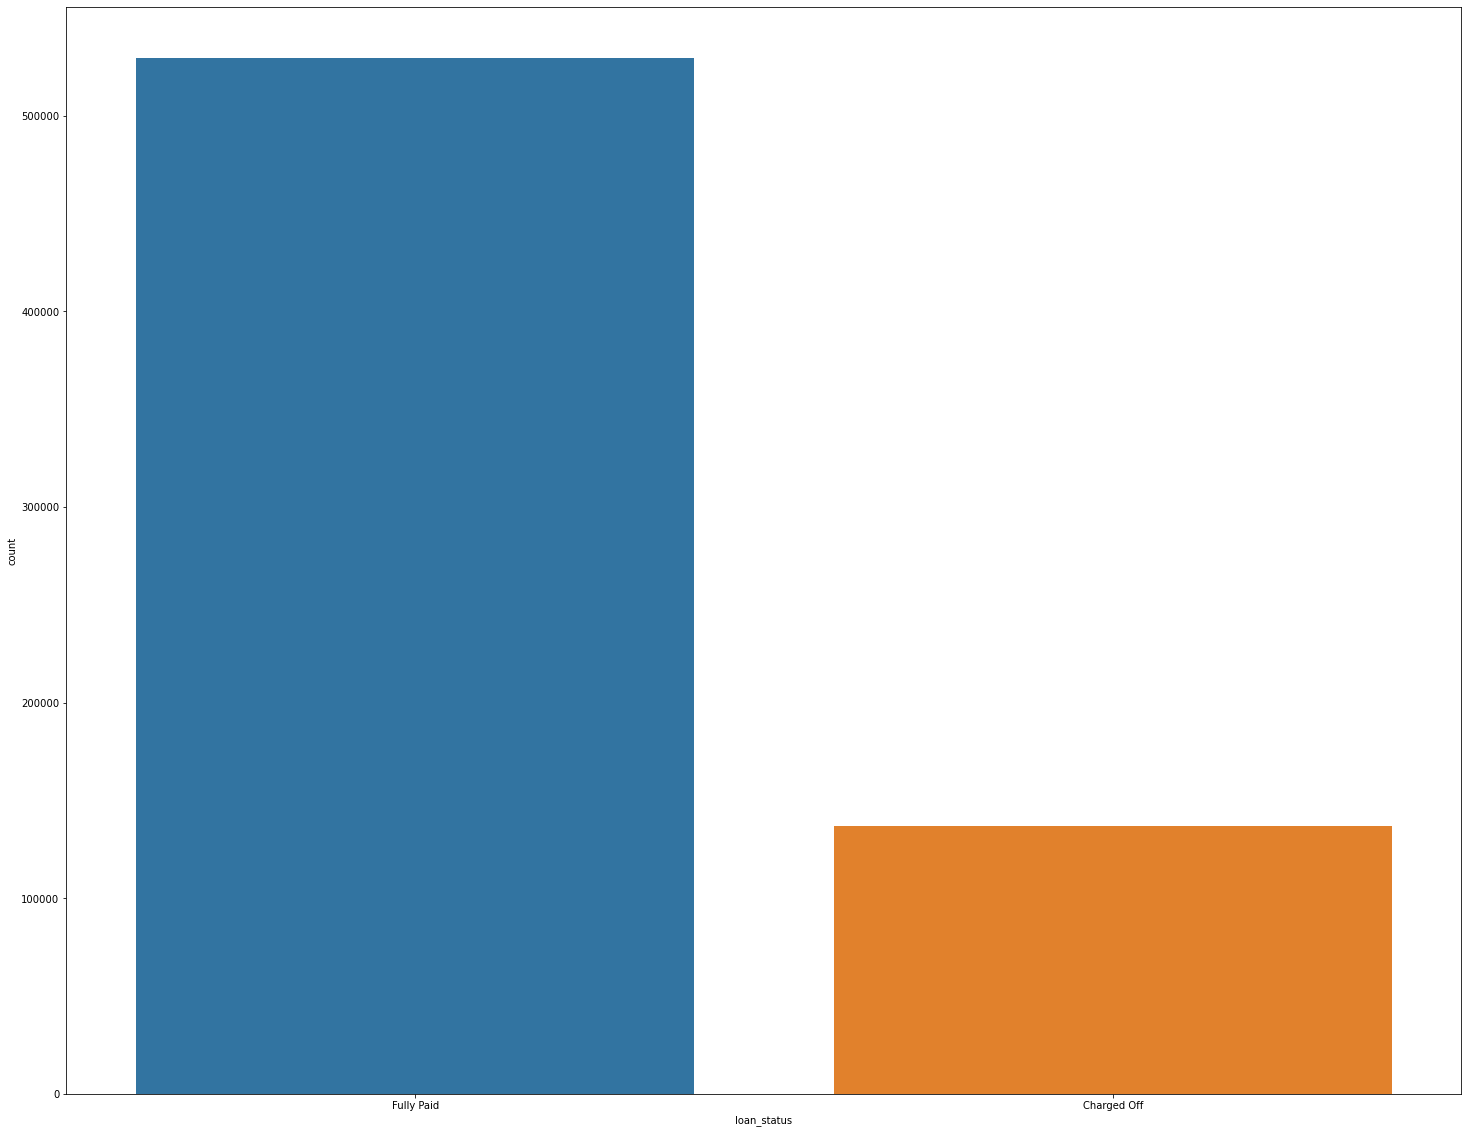

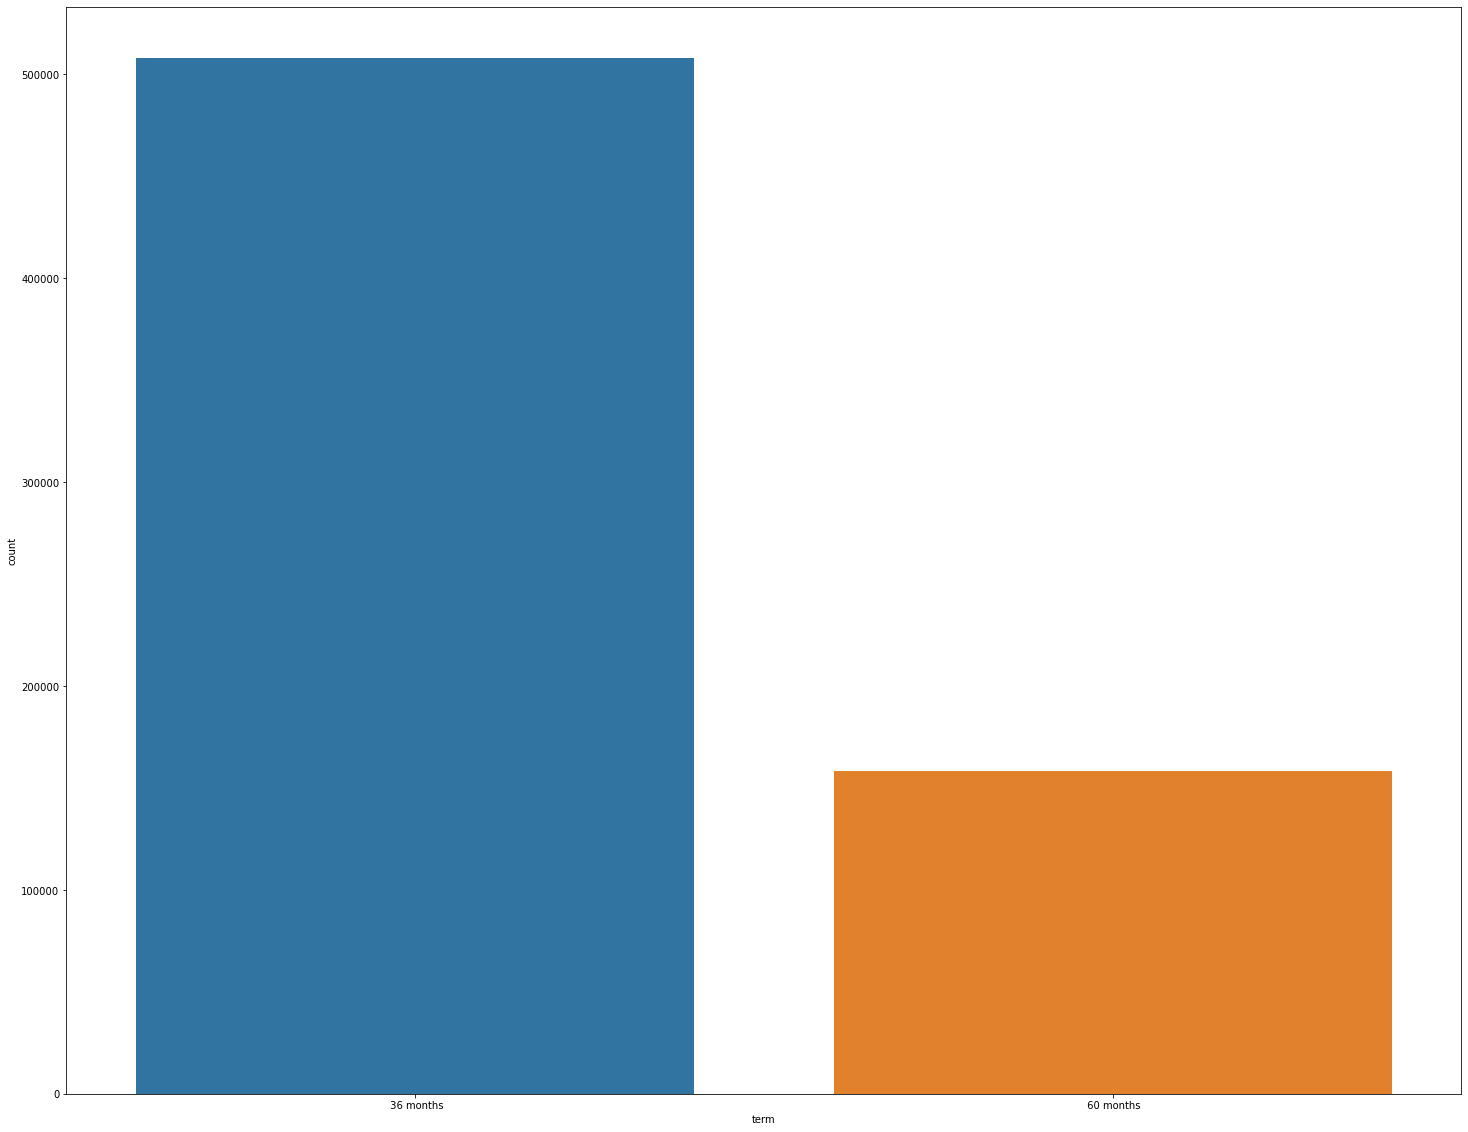

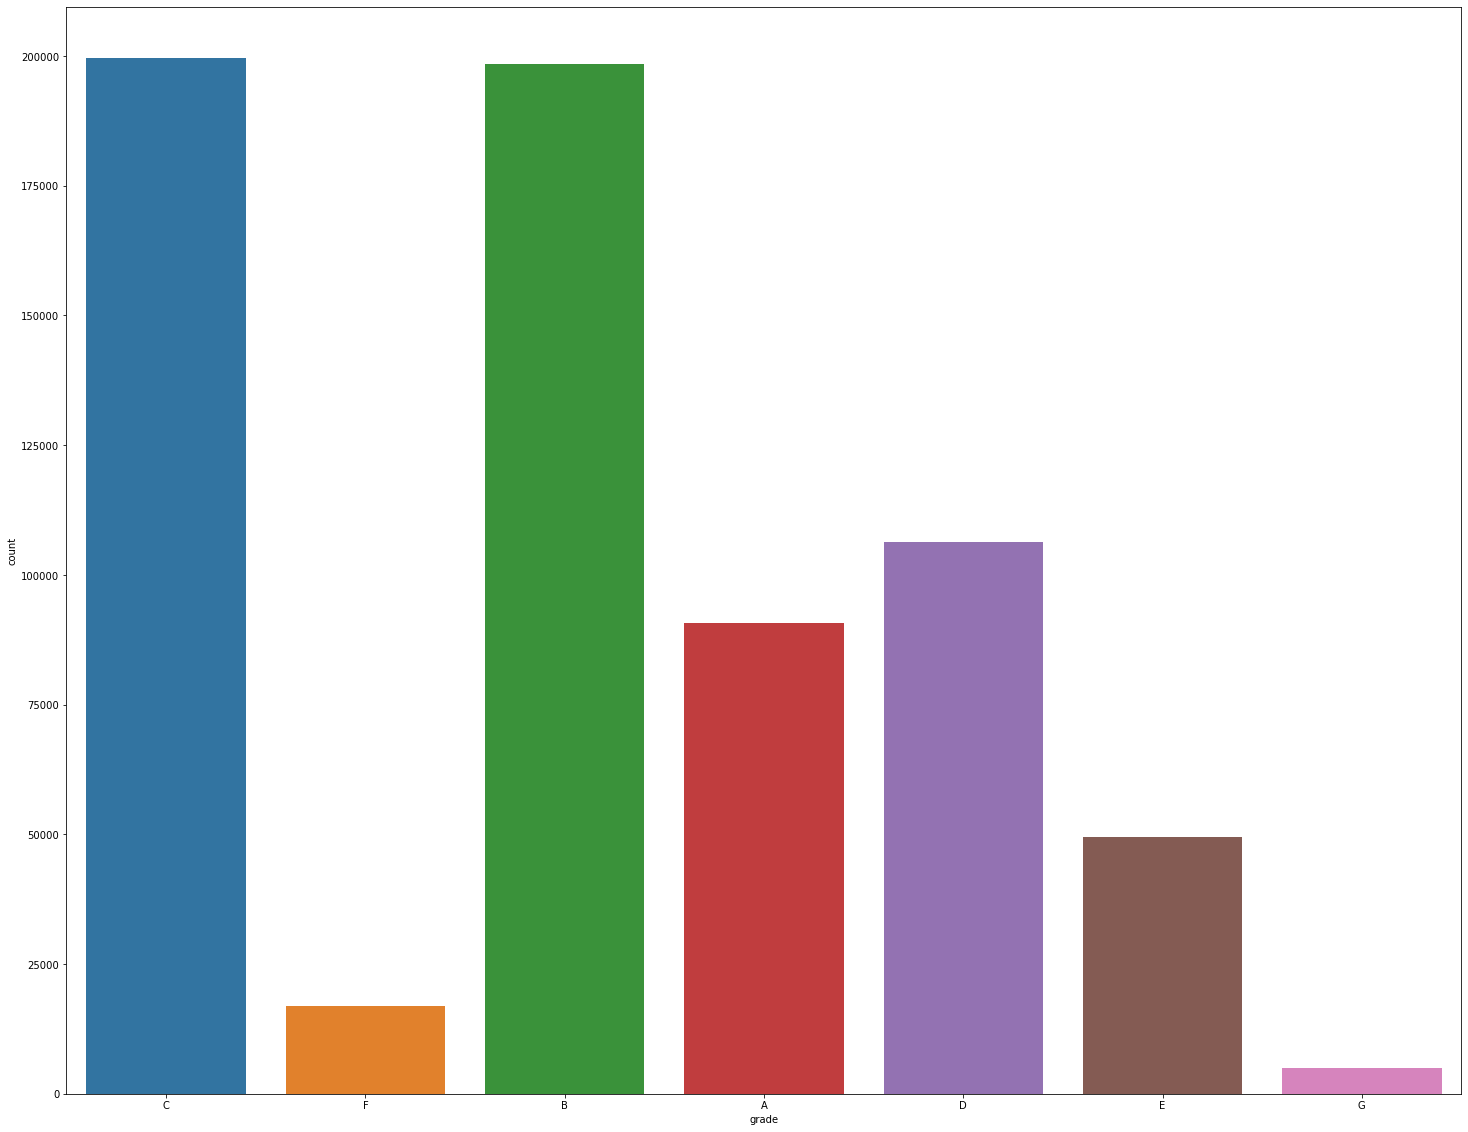

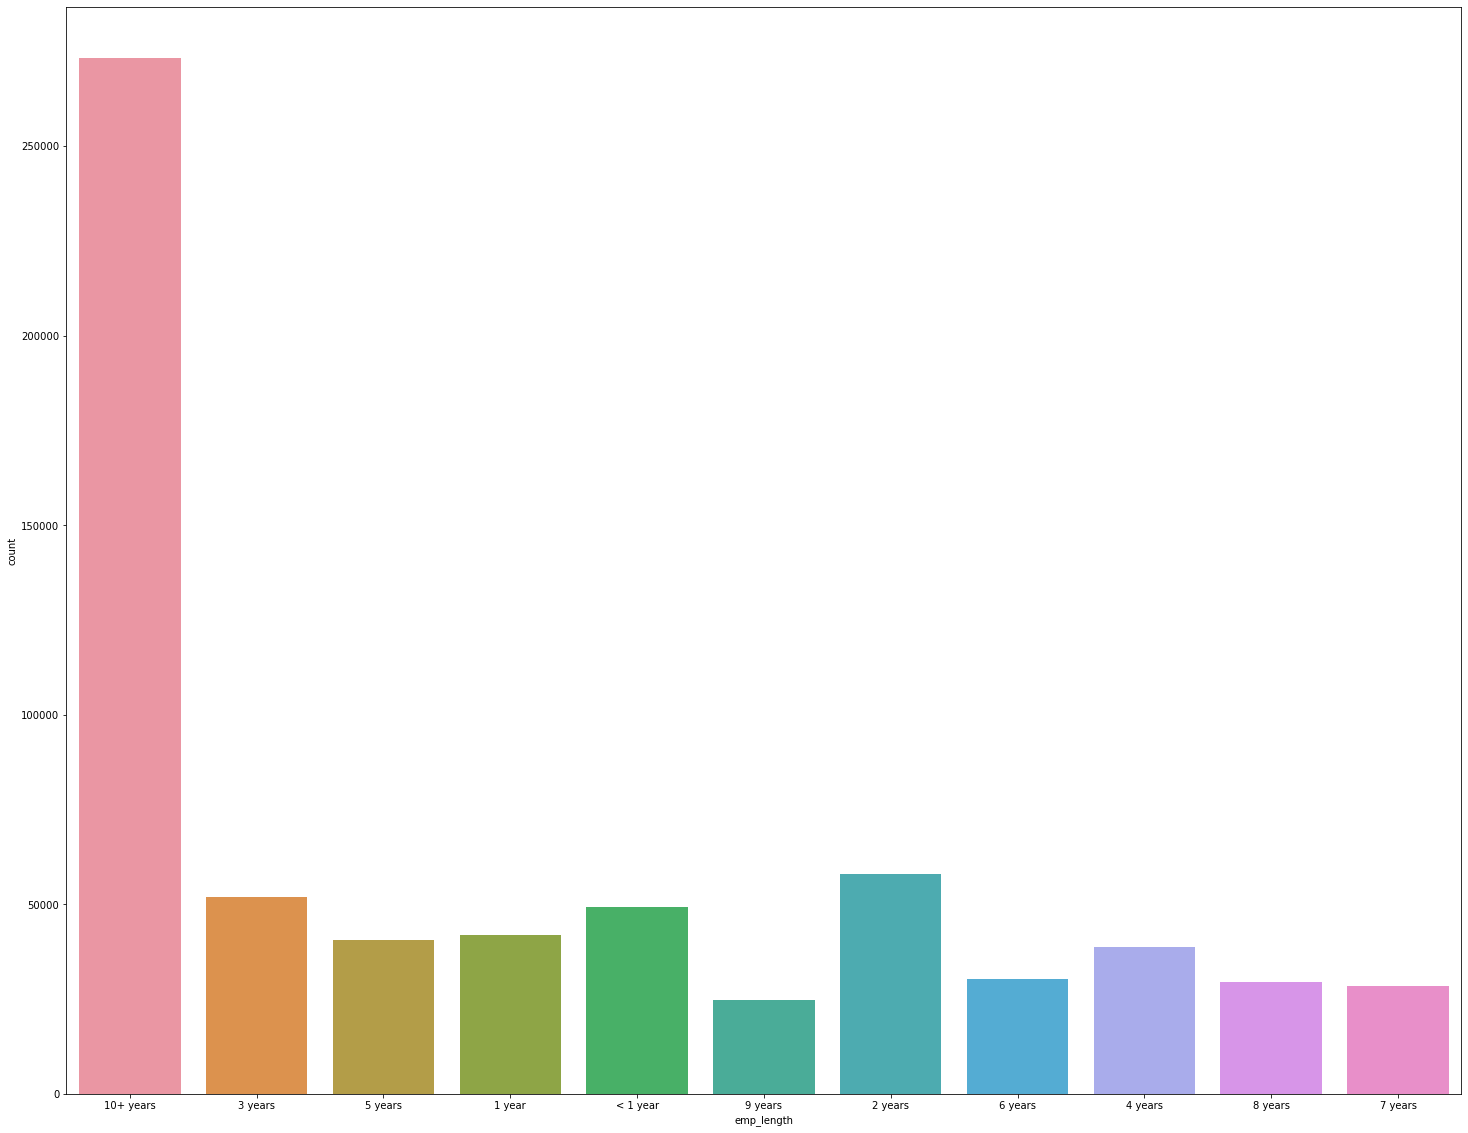

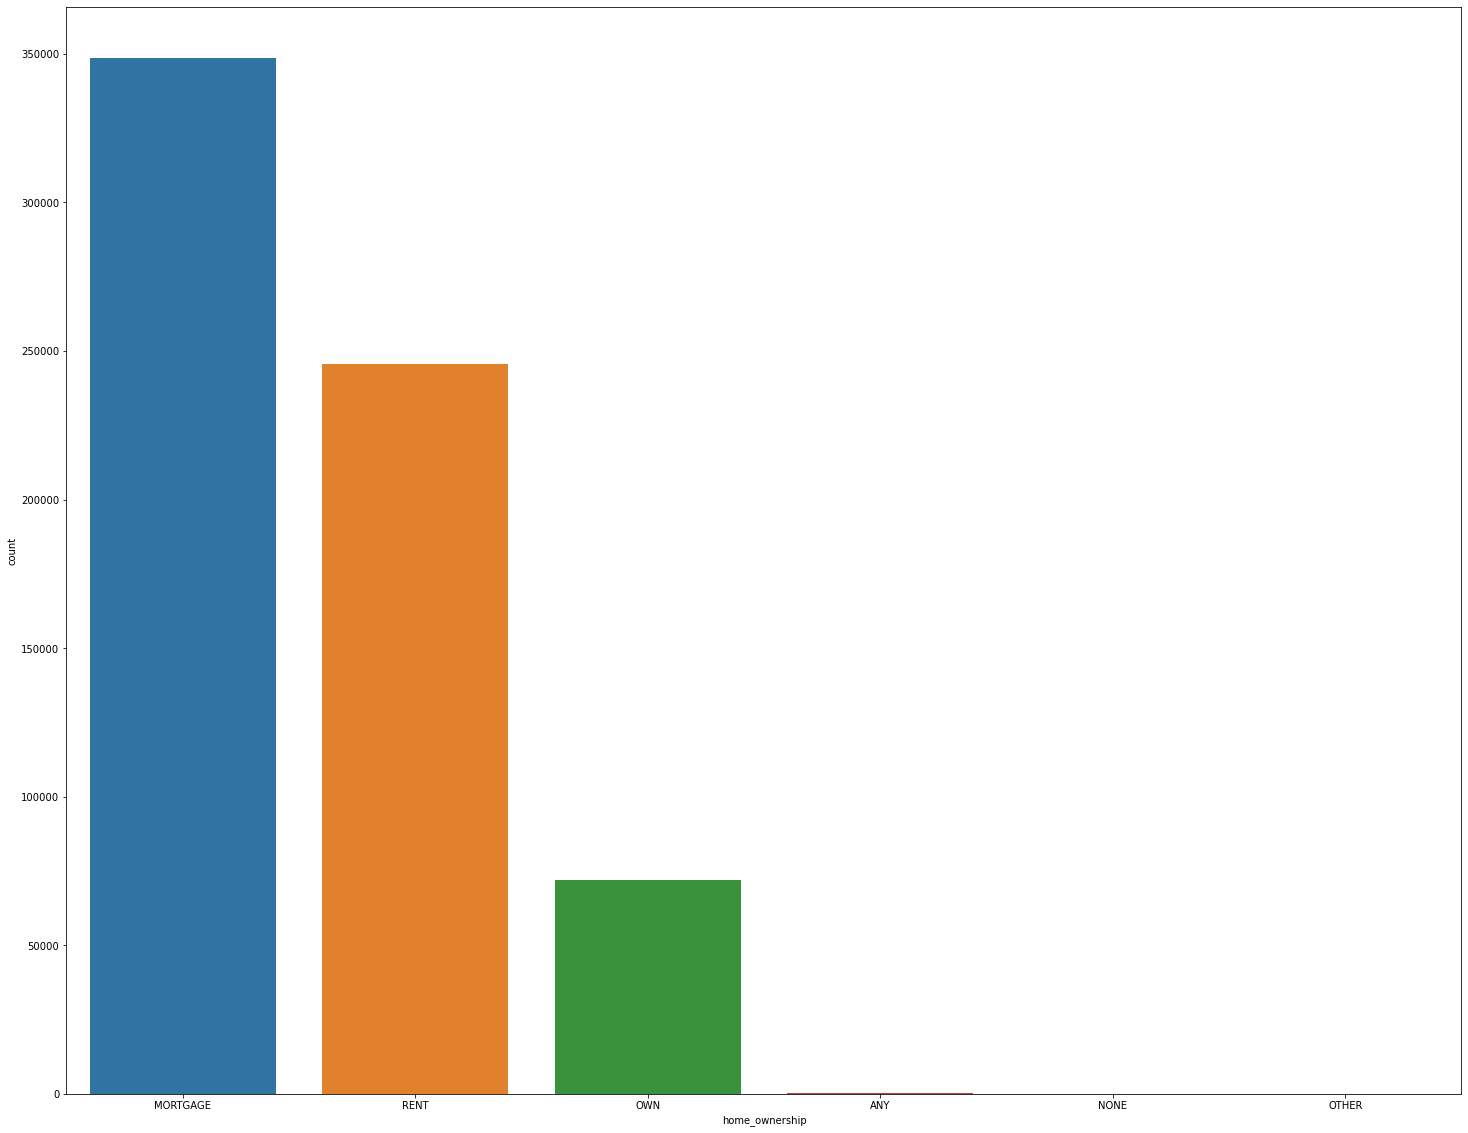

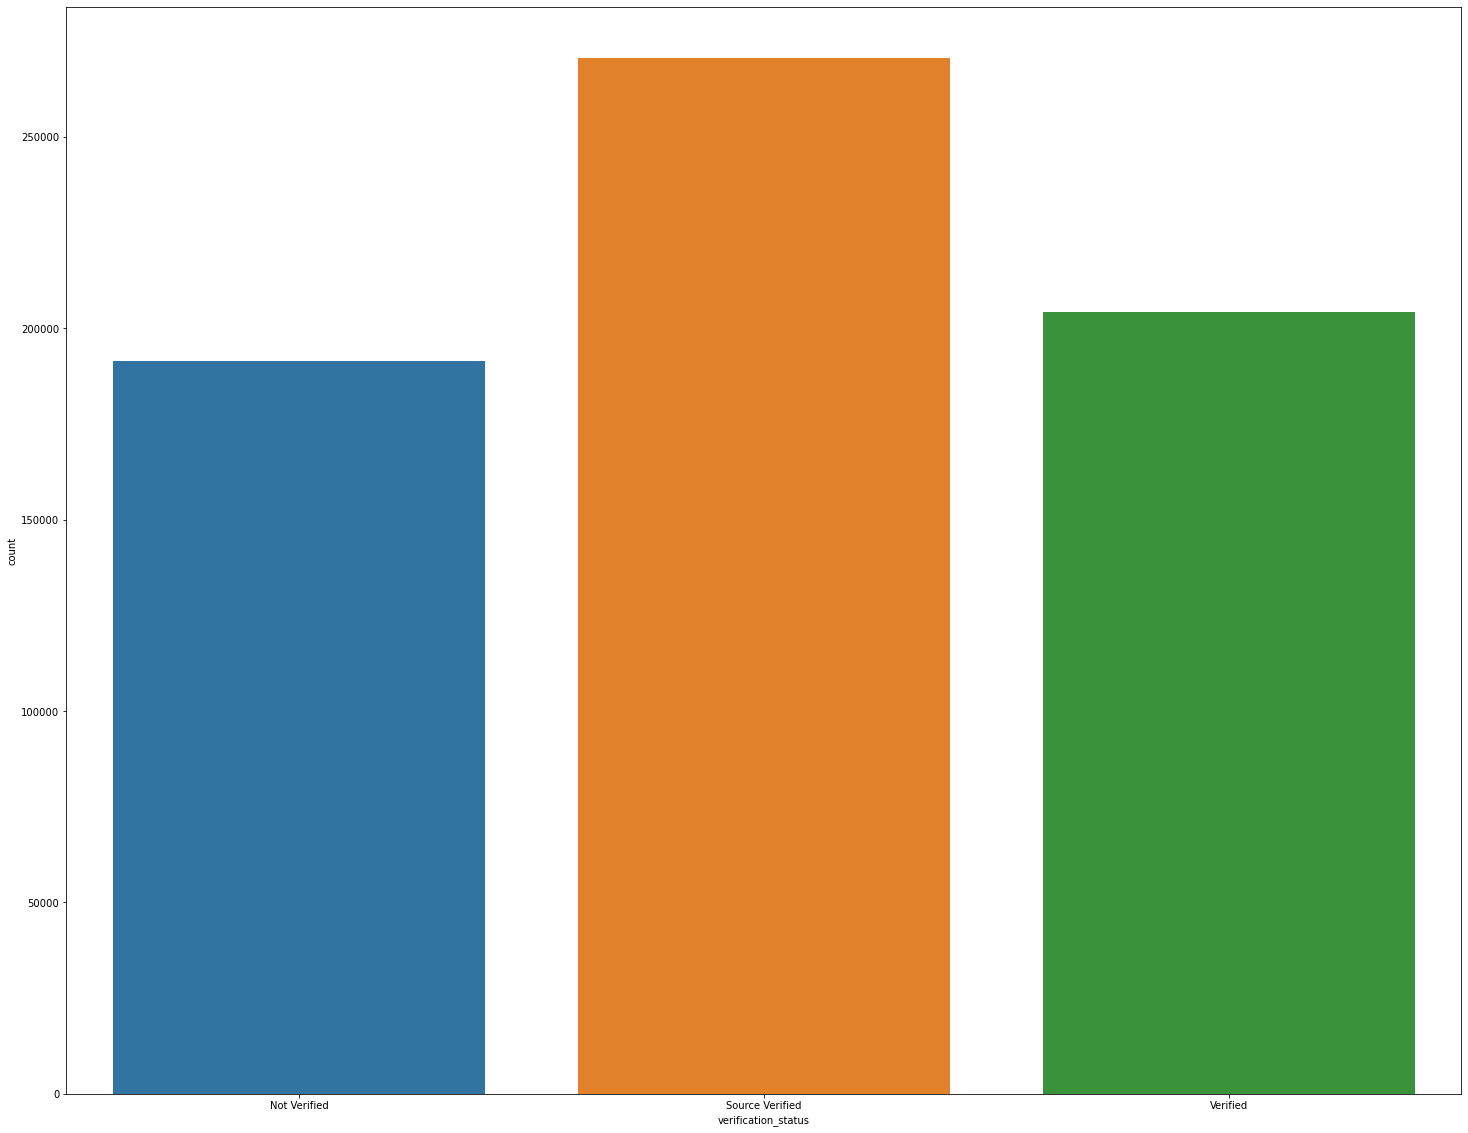

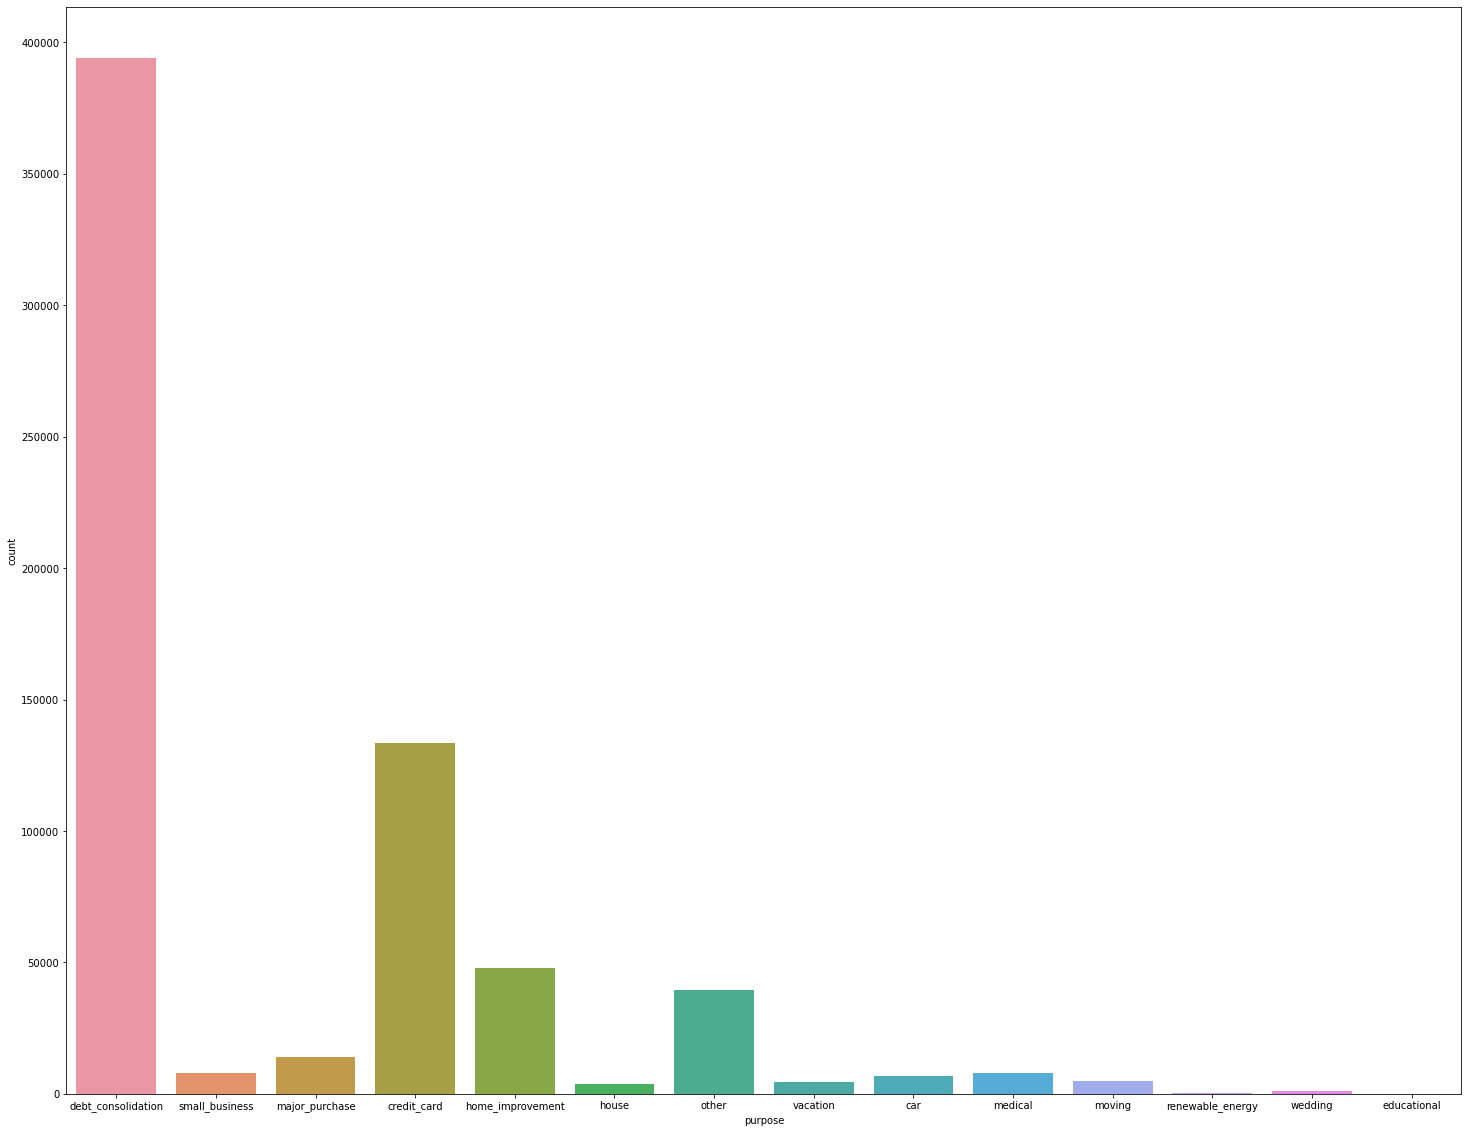

In [98]:
cols = ['loan_status','term','grade','emp_length','home_ownership','verification_status','purpose']
for col in cols:
    plt.figure(figsize = (25,20))
    sns.countplot(data = data,x = col)
    

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

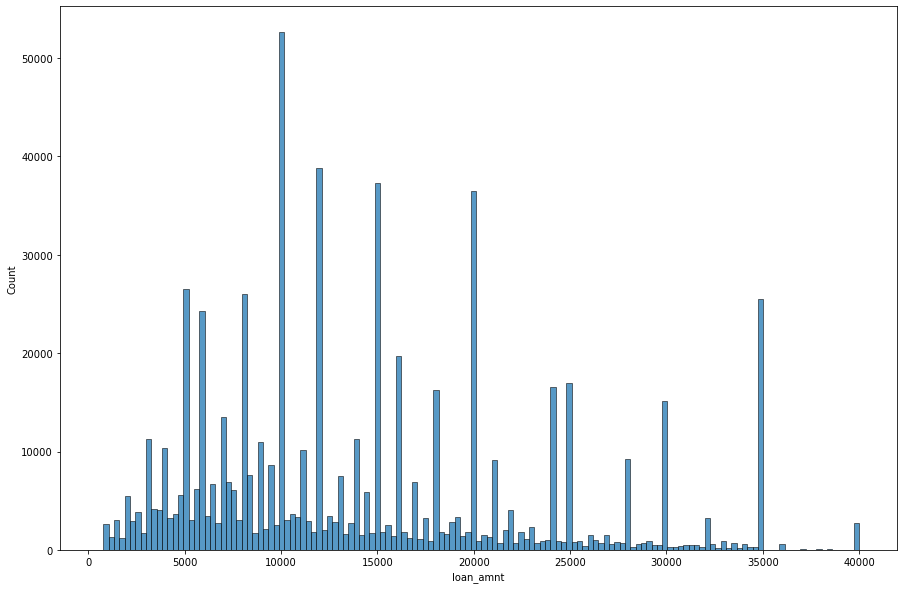

In [100]:
plt.figure(figsize = (15,10))
sns.histplot(data['loan_amnt'],kde = False)

In [102]:
data['fico_average'] = (data['fico_range_low'] + data['fico_range_high'])/2

In [111]:
columns = ['loan_amnt','int_rate','installment','fico_average','revol_util']

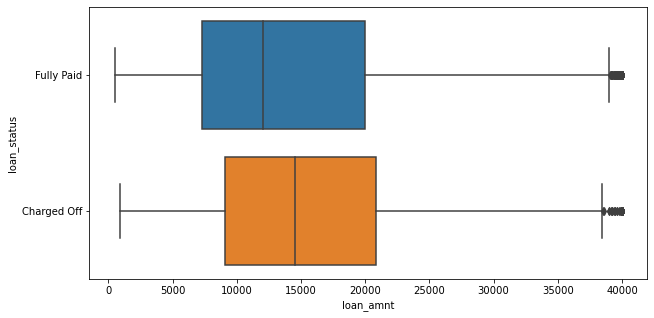

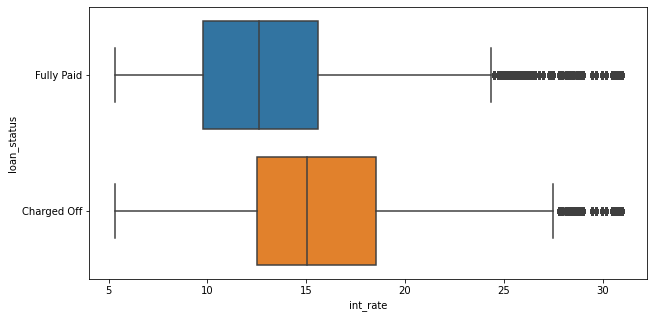

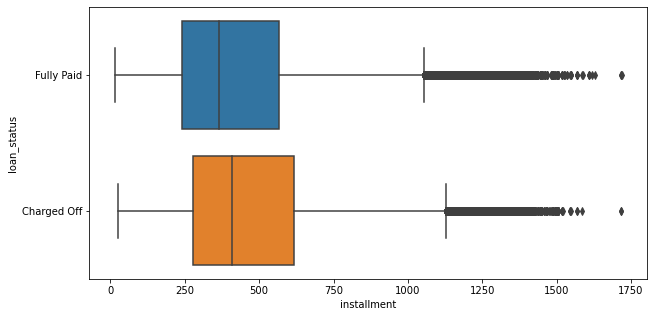

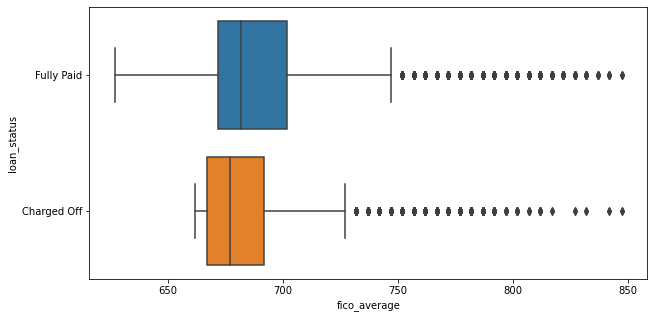

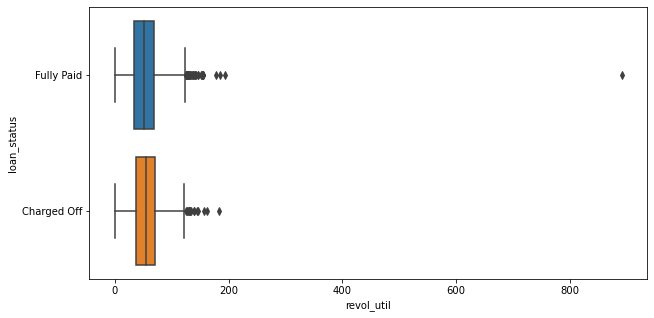

In [112]:
for col in columns:
    plt.figure(figsize = (10,5))
    sns.boxplot(data = data,x = col,y='loan_status')

In [118]:
c = data.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)
corr_pair = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pair.columns = ['Feature1','Feature2','corr']
no_same_fea = corr_pair.Feature1 != corr_pair.Feature2
corr_cond = corr_pair['corr'] > 0.80
corr_pair[no_same_fea & corr_cond]

,Feature1,Feature2,corr
1,fico_average,fico_range_low,1.000000
2,fico_range_high,fico_average,1.000000
3,fico_range_low,fico_range_high,1.000000
4,loan_amnt,funded_amnt,0.999711
5,total_pymnt_inv,total_pymnt,0.999089
6,funded_amnt_inv,funded_amnt,0.998883
7,loan_amnt,funded_amnt_inv,0.998526
8,num_sats,open_acc,0.998520
9,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.981641
10,recoveries,collection_recovery_fee,0.976450


<AxesSubplot:xlabel='total_pymnt', ylabel='installment'>

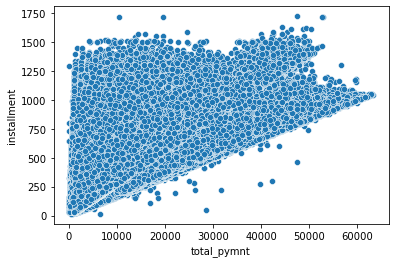

In [119]:
sns.scatterplot(x = data.total_pymnt,y = data.installment)